In [46]:
from h5py import File as H5File
from PIL import Image
from keras.layers import Input
from keras.models import Model, Sequential
import matplotlib.pylab as plt
import numpy as np
from skimage.exposure import equalize_hist

import blusky.datasets as datasets
from blusky.transforms.cascade_2d import Cascade2D
from blusky.transforms.default_decimation import DefaultDecimation, NoDecimation

# from blusky.wavelets.i_wavelet_2d import IWavelet2D
from blusky.wavelets.morlet2d import Morlet2D

In [52]:
wav1 = Morlet2D(sample_rate=0.004, 
               center_frequency=90., 
               bandwidth=(50.,25.), 
               crop=3.5,
               taper=False)

wav2 = Morlet2D(sample_rate=0.004, 
               center_frequency=45., 
               bandwidth=(40.,20), 
               crop=3.5,
               taper=False)

wav3 = Morlet2D(sample_rate=0.004, 
               center_frequency=22.5, 
               bandwidth=(20,10.), 
               crop=3.5,
               taper=False)


inp = Input(shape=(99,99,1))
cascade = Cascade2D("none", 0, 
                    decimation=DefaultDecimation(oversampling=1),
                    angles=(0.0, 45., 90.), 
                    wavelets=[wav1, wav2, wav3])

# create the transform
result = cascade.transform(inp)

model = Model(inputs=inp, outputs=result)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 99, 99, 1)    0                                            
__________________________________________________________________________________________________
depthwise_conv2d_99 (DepthwiseC (None, 99, 99, 3)    510         input_9[0][0]                    
__________________________________________________________________________________________________
depthwise_conv2d_100 (Depthwise (None, 99, 99, 3)    510         input_9[0][0]                    
__________________________________________________________________________________________________
depthwise_conv2d_101 (Depthwise (None, 50, 50, 3)    870         input_9[0][0]                    
__________________________________________________________________________________________________
depthwise_

In [53]:
from os import path

imgs = []
for label in ['chaotic', 'fault', 'salt', 'horizon']:
    for im in range(0,3):
        data = path.join(
            path.join(path.dirname(datasets.__file__), "test_tiles"), "{}{}.png".format(label, im)
        )
        data = np.array(Image.open(data)).astype(np.float32)
        data /= np.max(data)
        
        imgs.append(data)
imgs = np.array(imgs)
imgs.shape = list(imgs.shape) + [1]

In [54]:
imgs.shape

(12, 99, 99, 1)

In [55]:
result = model.predict(imgs)

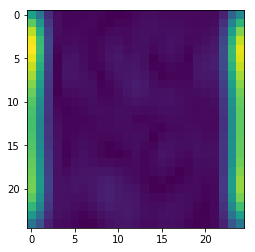

In [56]:
plt.figure()
plt.imshow(result[4][-1,:,:,0])
plt.show()

In [59]:
for r in result:
    print(r.shape)

(12, 99, 99, 3)
(12, 50, 50, 3)
(12, 25, 25, 3)
(12, 50, 50, 9)
(12, 25, 25, 9)
(12, 13, 13, 9)
